In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import keras.models as Models
import keras.layers as Layers
import keras.backend as Backend
import numpy as np

D:\conda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\conda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\conda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\conda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a

# Импорт выборки

In [2]:
image_size = (32,32)
path_train= '.\\data\\train'
path_test = '.\\data\\test'

In [3]:
train_data = keras.preprocessing.image.ImageDataGenerator(
)

train_set = train_data.flow_from_directory(
    path_train,
    target_size=image_size,
    batch_size=1000,
    color_mode='rgb',
    classes=['alpha','beta','gamma','delta','epsilon'],
    class_mode='categorical',
    shuffle=True,
    seed=42
)

test_data = keras.preprocessing.image.ImageDataGenerator(
)

test_set = test_data.flow_from_directory(
    path_test,
    target_size = image_size,
    batch_size = 500,
    color_mode='rgb',
    classes=['alpha','beta','gamma','delta','epsilon'],
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [4]:
# преобразуем в отдельные массивы

X_train = train_set[0][0].astype(np.uint8)
Y_train = train_set[0][1].astype(np.uint8)

X_test = test_set[0][0].astype(np.uint8)
Y_test = test_set[0][1].astype(np.uint8)

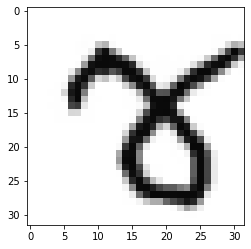

In [5]:
# отобразим один символ

plt.imshow(X_train[7])

In [6]:
# проверим, совпадает ли ванхот кодирование символа

Y_train[7]

array([0, 0, 1, 0, 0], dtype=uint8)

In [7]:
# нормируем тренировочную и тестовую выборку

X_train = X_train.astype(np.float32) / 255.0

X_test =  X_test.astype(np.float32) / 255.0

In [8]:
# cоздадим полную выборку

X_train_full = np.concatenate([X_train, X_test])
Y_train_full = np.concatenate([Y_train, Y_test])

# Сеть с одним свёрточным слоем

In [30]:
num_classes = 5
num_epochs = 100
batch = 128 
depth = 64 
hidden_size = 256

In [31]:
# cначала тренировочная выборка - 2 участика, тестовая - третий

Backend.clear_session()

In [32]:
inp = Layers.Input(shape = X_train.shape[1:])

conv_1 = Layers.Conv2D(depth,
                       kernel_size=(3, 3),
                       activation='relu')(inp)

pool_1 = Layers.MaxPooling2D(pool_size=(2, 2))(conv_1)

flat = Layers.Flatten()(pool_1)

drop_1 = Layers.Dropout(0.25)(flat)

hidden_1 = Layers.Dense(output_dim = hidden_size,
                        activation='relu')(drop_1)

drop_2 = Layers.Dropout(0.25)(hidden_1)

out = Layers.Dense(num_classes,
                   activation='softmax')(drop_2)

model = Models.Model(input=inp, output=out)

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])


D:\conda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  
D:\conda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [33]:
model.fit(
	X_train,
	Y_train,
	batch_size = batch,
	epochs = num_epochs,
    validation_data=(X_test, Y_test)
)

Train on 1000 samples, validate on 500 samples
Epoch 1/100
1000/1000 [==============================] - 1s 540us/step - loss: 2.4602 - accuracy: 0.2450 - val_loss: 1.6702 - val_accuracy: 0.2000
Epoch 2/100
1000/1000 [==============================] - 0s 238us/step - loss: 1.3120 - accuracy: 0.5430 - val_loss: 1.4221 - val_accuracy: 0.5340
Epoch 3/100
1000/1000 [==============================] - 0s 232us/step - loss: 0.9305 - accuracy: 0.7940 - val_loss: 1.2981 - val_accuracy: 0.5680
Epoch 4/100
1000/1000 [==============================] - 0s 219us/step - loss: 0.6290 - accuracy: 0.8590 - val_loss: 1.1504 - val_accuracy: 0.5920
Epoch 5/100
1000/1000 [==============================] - 0s 215us/step - loss: 0.4073 - accuracy: 0.9220 - val_loss: 1.1310 - val_accuracy: 0.5720
Epoch 6/100
1000/1000 [==============================] - 0s 215us/step - loss: 0.2777 - accuracy: 0.9450 - val_loss: 1.0209 - val_accuracy: 0.5960
Epoch 7/100
1000/1000 [==============================] - 0s 221us/step 

1000/1000 [==============================] - 0s 223us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.2376 - val_accuracy: 0.6540
Epoch 57/100
1000/1000 [==============================] - 0s 218us/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 1.1589 - val_accuracy: 0.6900
Epoch 58/100
1000/1000 [==============================] - 0s 222us/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.2863 - val_accuracy: 0.6680
Epoch 59/100
1000/1000 [==============================] - 0s 221us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.2740 - val_accuracy: 0.6680
Epoch 60/100
1000/1000 [==============================] - 0s 224us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.2707 - val_accuracy: 0.6640
Epoch 61/100
1000/1000 [==============================] - 0s 222us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.1870 - val_accuracy: 0.6920
Epoch 62/100
1000/1000 [==============================] - 0s 224us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.1647 

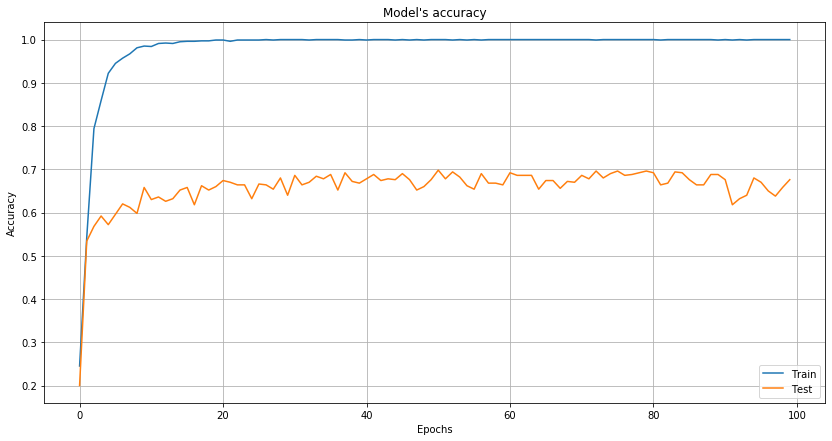

In [34]:
plt.figure(figsize=[14,7])
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.grid()
plt.title('Model\'s accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')   

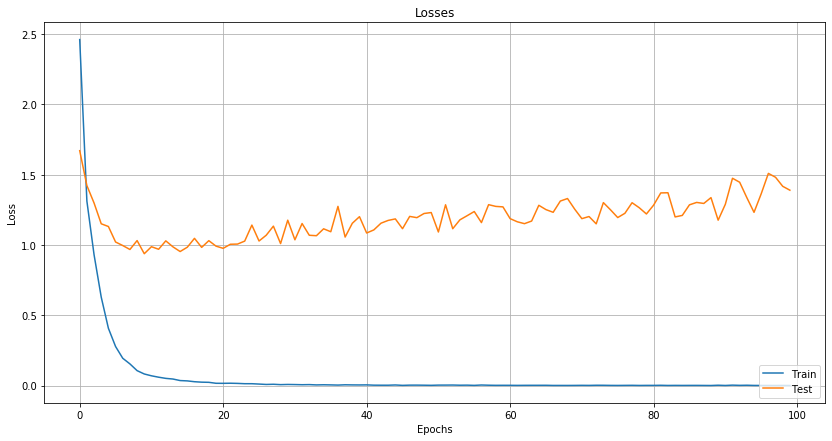

In [35]:
plt.figure(figsize=[14,7])
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.grid()
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')   

In [38]:
# попробуем 80 процентов всей выборки на обучение, 20 на тест

Backend.clear_session()

In [39]:
inp = Layers.Input(shape = X_train_full.shape[1:])

conv_1 = Layers.Conv2D(depth,
                       kernel_size=(3, 3),
                       activation='relu')(inp)

pool_1 = Layers.MaxPooling2D(pool_size=(2, 2))(conv_1)

flat = Layers.Flatten()(pool_1)

drop_1 = Layers.Dropout(0.25)(flat)

hidden_1 = Layers.Dense(output_dim = hidden_size,
                        activation='relu')(drop_1)

drop_2 = Layers.Dropout(0.25)(hidden_1)

out = Layers.Dense(num_classes,
                   activation='softmax')(drop_2)

model = Models.Model(input=inp, output=out)

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])


D:\conda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  
D:\conda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [40]:
model.fit(X_train_full,
          Y_train_full,
          batch_size = batch,
          epochs = num_epochs,
          validation_split= 0.2
         )

Train on 1200 samples, validate on 300 samples
Epoch 1/100
1200/1200 [==============================] - 0s 416us/step - loss: 2.8083 - accuracy: 0.2600 - val_loss: 1.6244 - val_accuracy: 0.2067
Epoch 2/100
1200/1200 [==============================] - 0s 234us/step - loss: 1.2292 - accuracy: 0.5617 - val_loss: 1.1924 - val_accuracy: 0.6433
Epoch 3/100
1200/1200 [==============================] - 0s 232us/step - loss: 0.7475 - accuracy: 0.8425 - val_loss: 0.8948 - val_accuracy: 0.7233
Epoch 4/100
1200/1200 [==============================] - 0s 219us/step - loss: 0.4565 - accuracy: 0.8825 - val_loss: 0.6444 - val_accuracy: 0.7600
Epoch 5/100
1200/1200 [==============================] - 0s 211us/step - loss: 0.2990 - accuracy: 0.9167 - val_loss: 0.4629 - val_accuracy: 0.8700
Epoch 6/100
1200/1200 [==============================] - 0s 218us/step - loss: 0.2031 - accuracy: 0.9508 - val_loss: 0.3531 - val_accuracy: 0.9267
Epoch 7/100
1200/1200 [==============================] - 0s 215us/step 

1200/1200 [==============================] - 0s 214us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0429 - val_accuracy: 0.9933
Epoch 57/100
1200/1200 [==============================] - 0s 219us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0430 - val_accuracy: 0.9933
Epoch 58/100
1200/1200 [==============================] - 0s 215us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0435 - val_accuracy: 0.9900
Epoch 59/100
1200/1200 [==============================] - 0s 212us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0418 - val_accuracy: 0.9900
Epoch 60/100
1200/1200 [==============================] - 0s 213us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0408 - val_accuracy: 0.9900
Epoch 61/100
1200/1200 [==============================] - 0s 213us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0418 - val_accuracy: 0.9900
Epoch 62/100
1200/1200 [==============================] - 0s 214us/step - loss: 9.1096e-04 - accuracy: 1.0000 - val_loss: 0.0

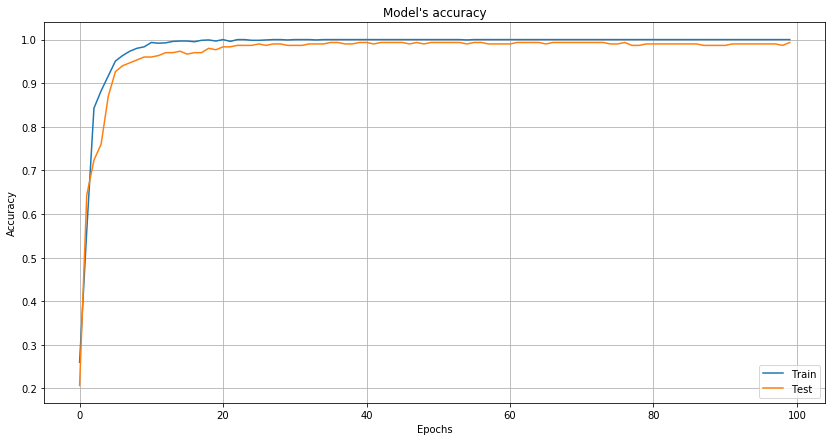

In [41]:
plt.figure(figsize=[14,7])
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.grid()
plt.title('Model\'s accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')   

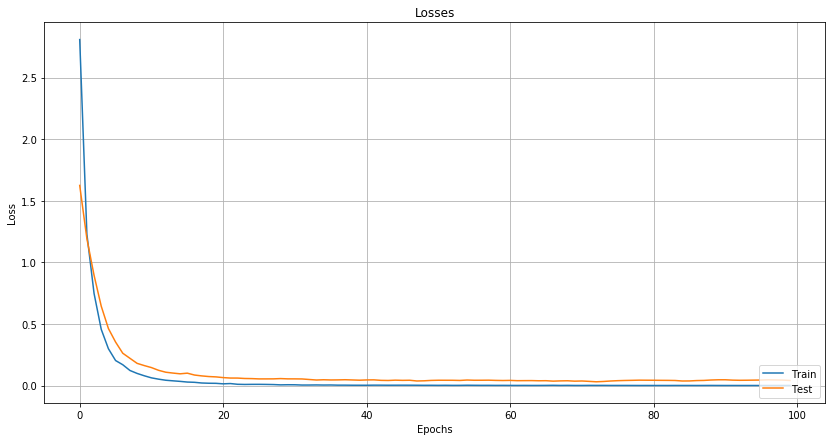

In [42]:
plt.figure(figsize=[14,7])
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.grid()
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')   

# Сеть с несколькими свёрточными слоями

In [76]:
num_classes = 5
num_epochs = 100
batch = 128
depth_1 = 16
depth_2 = 32 
depth_3 = 64 
hidden_size = 256

In [77]:
# аналогично cначала тренировочная выборка - 2 участика, тестовая - третий
Backend.clear_session()

In [78]:
inp = Layers.Input(shape = X_train.shape[1:])

conv_1 = Layers.Conv2D(depth_1,
                       kernel_size=(3, 3),
                       activation='relu')(inp)

pool_1 = Layers.MaxPooling2D(pool_size=(2, 2))(conv_1)

conv_2 = Layers.Conv2D(depth_2,
                       kernel_size=(3, 3),
                       activation='relu')(pool_1)

pool_2 = Layers.MaxPooling2D(pool_size=(2, 2))(conv_2)

conv_3 = Layers.Conv2D(depth_3,
                       kernel_size=(3, 3),
                       activation='relu')(pool_2)

flat = Layers.Flatten()(conv_3)

drop_1 = Layers.Dropout(0.25)(flat)

hidden_1 = Layers.Dense(output_dim = hidden_size,
                        activation='relu')(drop_1)

drop_2 = Layers.Dropout(0.25)(hidden_1)

out = Layers.Dense(num_classes,
                   activation='softmax')(drop_2)

model = Models.Model(input=inp, output=out)

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])


D:\conda\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
D:\conda\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [79]:
model.fit(
	X_train,
	Y_train,
	batch_size = batch,
	epochs = num_epochs,
    validation_data=(X_test, Y_test)
)

Train on 1000 samples, validate on 500 samples
Epoch 1/100
1000/1000 [==============================] - 1s 589us/step - loss: 1.6158 - accuracy: 0.2570 - val_loss: 1.5892 - val_accuracy: 0.3540
Epoch 2/100
1000/1000 [==============================] - 0s 142us/step - loss: 1.4492 - accuracy: 0.5840 - val_loss: 1.4792 - val_accuracy: 0.3180
Epoch 3/100
1000/1000 [==============================] - 0s 139us/step - loss: 0.9837 - accuracy: 0.7110 - val_loss: 1.2976 - val_accuracy: 0.4340
Epoch 4/100
1000/1000 [==============================] - 0s 132us/step - loss: 0.5476 - accuracy: 0.8100 - val_loss: 1.4403 - val_accuracy: 0.4200
Epoch 5/100
1000/1000 [==============================] - 0s 131us/step - loss: 0.3548 - accuracy: 0.8640 - val_loss: 1.1398 - val_accuracy: 0.5540
Epoch 6/100
1000/1000 [==============================] - 0s 132us/step - loss: 0.2489 - accuracy: 0.9120 - val_loss: 1.1499 - val_accuracy: 0.5540
Epoch 7/100
1000/1000 [==============================] - 0s 131us/step 

Epoch 56/100
1000/1000 [==============================] - 0s 134us/step - loss: 3.9055e-04 - accuracy: 1.0000 - val_loss: 0.9803 - val_accuracy: 0.7380
Epoch 57/100
1000/1000 [==============================] - 0s 134us/step - loss: 3.4356e-04 - accuracy: 1.0000 - val_loss: 1.0853 - val_accuracy: 0.7240
Epoch 58/100
1000/1000 [==============================] - 0s 132us/step - loss: 6.8590e-04 - accuracy: 1.0000 - val_loss: 0.9612 - val_accuracy: 0.7400
Epoch 59/100
1000/1000 [==============================] - 0s 132us/step - loss: 3.5206e-04 - accuracy: 1.0000 - val_loss: 0.8982 - val_accuracy: 0.7560
Epoch 60/100
1000/1000 [==============================] - 0s 137us/step - loss: 4.1254e-04 - accuracy: 1.0000 - val_loss: 0.9941 - val_accuracy: 0.7380
Epoch 61/100
1000/1000 [==============================] - 0s 133us/step - loss: 3.3947e-04 - accuracy: 1.0000 - val_loss: 0.9562 - val_accuracy: 0.7520
Epoch 62/100
1000/1000 [==============================] - 0s 136us/step - loss: 4.9816e-

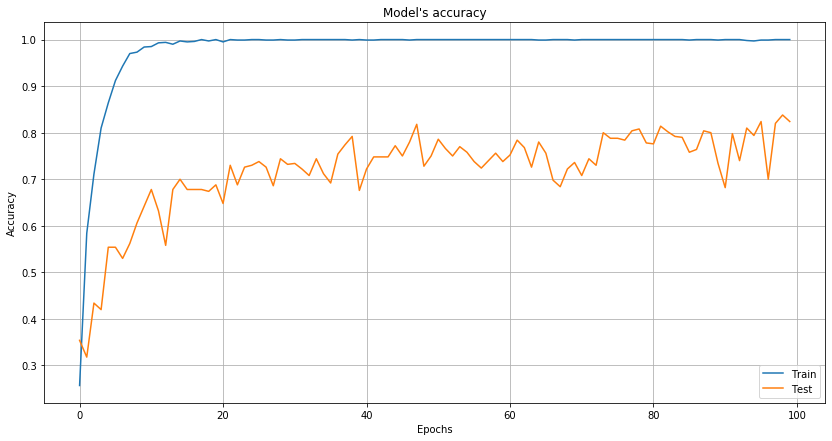

In [80]:
plt.figure(figsize=[14,7])
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.grid()
plt.title('Model\'s accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')   

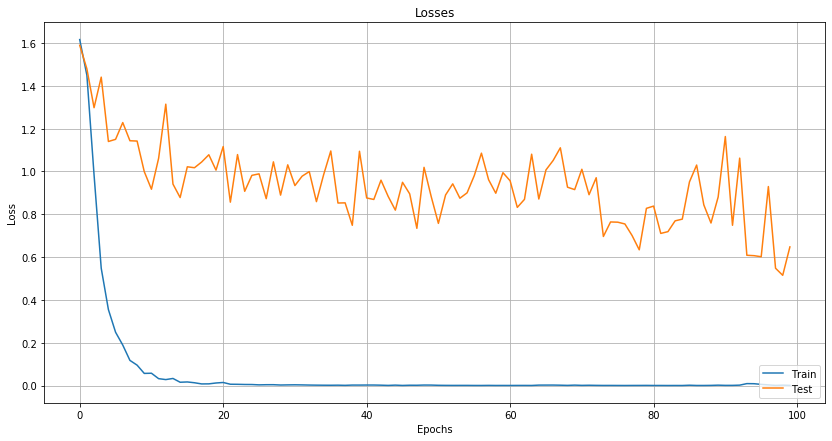

In [81]:
plt.figure(figsize=[14,7])
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.grid()
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')   

In [82]:
# теперь 80 процентов всей выборки на обучение, 20 на тест

Backend.clear_session()

In [83]:
inp = Layers.Input(shape = X_train.shape[1:])

conv_1 = Layers.Conv2D(depth_1,
                       kernel_size=(3, 3),
                       activation='relu')(inp)

pool_1 = Layers.MaxPooling2D(pool_size=(2, 2))(conv_1)

conv_2 = Layers.Conv2D(depth_2,
                       kernel_size=(3, 3),
                       activation='relu')(pool_1)

pool_2 = Layers.MaxPooling2D(pool_size=(2, 2))(conv_2)

conv_3 = Layers.Conv2D(depth_3,
                       kernel_size=(3, 3),
                       activation='relu')(pool_2)

flat = Layers.Flatten()(conv_3)

drop_1 = Layers.Dropout(0.25)(flat)

hidden_1 = Layers.Dense(output_dim = hidden_size,
                        activation='relu')(drop_1)

drop_2 = Layers.Dropout(0.25)(hidden_1)

out = Layers.Dense(num_classes,
                   activation='softmax')(drop_2)

model = Models.Model(input=inp, output=out)

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])


D:\conda\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
D:\conda\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [84]:
model.fit(X_train_full,
          Y_train_full,
          batch_size = batch,
          epochs = num_epochs,
          validation_split= 0.2
         )

Train on 1200 samples, validate on 300 samples
Epoch 1/100
1200/1200 [==============================] - 0s 400us/step - loss: 1.5300 - accuracy: 0.3350 - val_loss: 1.3838 - val_accuracy: 0.6200
Epoch 2/100
1200/1200 [==============================] - 0s 147us/step - loss: 1.0570 - accuracy: 0.6708 - val_loss: 0.8031 - val_accuracy: 0.7300
Epoch 3/100
1200/1200 [==============================] - 0s 140us/step - loss: 0.6494 - accuracy: 0.7600 - val_loss: 0.5285 - val_accuracy: 0.8500
Epoch 4/100
1200/1200 [==============================] - 0s 131us/step - loss: 0.3993 - accuracy: 0.8708 - val_loss: 0.3137 - val_accuracy: 0.9400
Epoch 5/100
1200/1200 [==============================] - 0s 131us/step - loss: 0.2329 - accuracy: 0.9275 - val_loss: 0.2118 - val_accuracy: 0.9500
Epoch 6/100
1200/1200 [==============================] - 0s 131us/step - loss: 0.1426 - accuracy: 0.9608 - val_loss: 0.1090 - val_accuracy: 0.9833
Epoch 7/100
1200/1200 [==============================] - 0s 135us/step 

Epoch 56/100
1200/1200 [==============================] - 0s 130us/step - loss: 3.8593e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 57/100
1200/1200 [==============================] - 0s 130us/step - loss: 2.1612e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 58/100
1200/1200 [==============================] - 0s 129us/step - loss: 2.6860e-04 - accuracy: 1.0000 - val_loss: 8.7294e-04 - val_accuracy: 1.0000
Epoch 59/100
1200/1200 [==============================] - 0s 132us/step - loss: 2.8048e-04 - accuracy: 1.0000 - val_loss: 9.8042e-04 - val_accuracy: 1.0000
Epoch 60/100
1200/1200 [==============================] - 0s 144us/step - loss: 3.5443e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 61/100
1200/1200 [==============================] - 0s 134us/step - loss: 3.0019e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 62/100
1200/1200 [==============================] - 0s 133us/step - loss: 

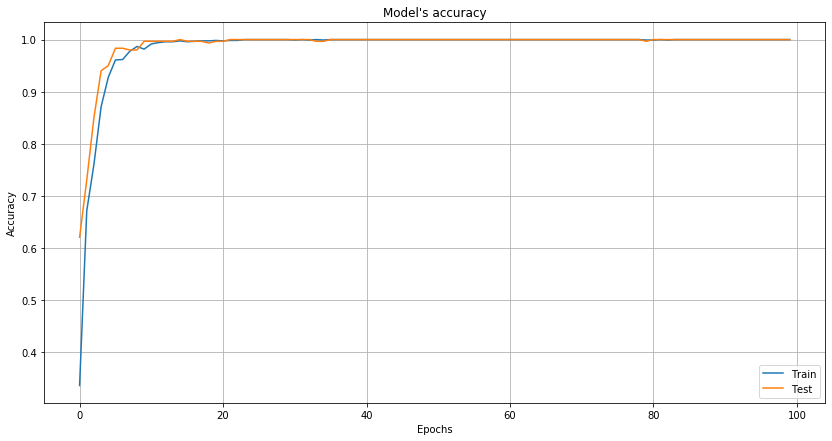

In [85]:
plt.figure(figsize=[14,7])
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.grid()
plt.title('Model\'s accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')   

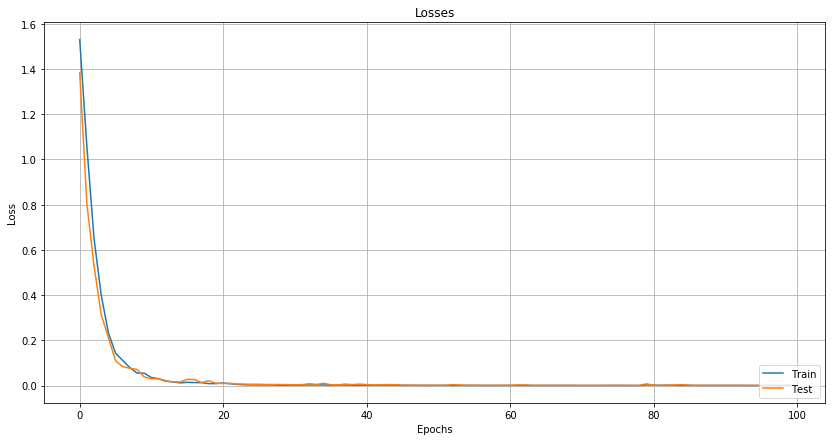

In [86]:
plt.figure(figsize=[14,7])
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.grid()
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right') 